In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation of fractional Levi stable motion via its integral representation

## $\alpha$-stable distribution

In [2]:
def stable(alpha, beta, gamma, delta, n):
    Theta = np.random.uniform(-np.pi/2, np.pi/2, n)
    W = np.random.exponential(1, n)
    theta_0 = np.arctan(beta * np.tan(np.pi * alpha/2))/alpha
    if alpha != 1:
        Z = np.sin(alpha * (theta_0 + Theta))/(np.cos(alpha * theta_0) * np.cos(Theta))**(1/alpha) * (np.cos(alpha * theta_0 + (alpha - 1) * Theta) / W)**((1-alpha) / alpha)
        X = gamma * Z + delta
    else:
        Z = 2/np.pi * ((np.pi/2 + beta * Theta) * np.tan(Theta) - beta * np.log((np.pi/2 * W * np.cos(Theta)) / (np.pi/2 + beta * Theta)))
        X = gamma * Z + delta + beta * 2/np.pi * gamma * np.log(gamma)
    return X

## Levi process

In [3]:
def simulate_process(Z, n, delta):
    X = [0]
    for k in range(n-1):
        X.append(X[k] + Z[k])
    return X

## Fractional Levi stable motion

In [4]:
def plus(x):
    return max(0, x)

In [5]:
def simulate_alpha_stable_pr(n, delta, alpha):
    beta = 0
    gamma = delta**(1 / alpha)
    delt = 0
    Z = stable(alpha, beta, gamma, delt, n)
    X = simulate_process(Z, n, delta)
    return X

In [6]:
def f_flsm(x, t, H, alpha):
    return plus(t - x)**(H - 1/alpha) - plus(-x)**(H - 1/alpha)

In [7]:
def simulate_flsn(M1, M2, I, H, alpha, t):
    s = np.linspace(-M1, M2, I)
    Z = simulate_alpha_stable_pr(I, 1, alpha)
    incr = np.diff(Z)
    X = np.zeros(len(t))
    for i, t_i in enumerate(t):
        for j, s_j in enumerate(s[:-1]):
            X[i] += f_flsm(s_j, t_i, H, alpha) * incr[j]
        X[i] = np.sum(X[i])
    return X

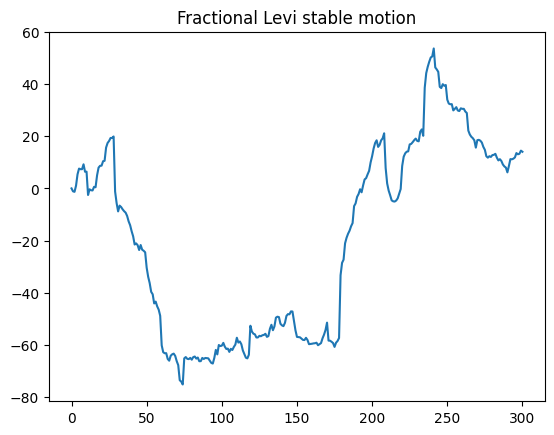

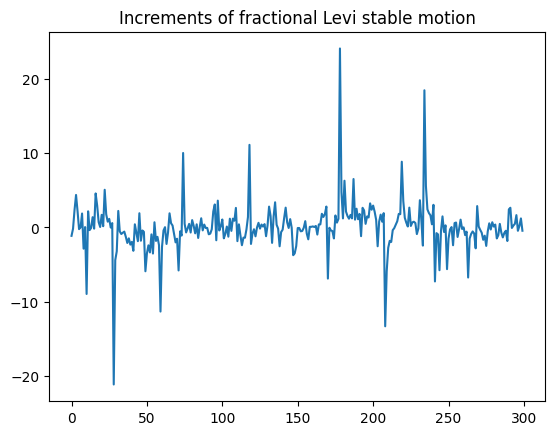

In [12]:
T = 300
M1 = 100
M2 = T
I = M1 + M2 + 1
H = 0.9
alpha = 1.5
t = np.linspace(0, T, T+1)
Z = simulate_flsn(M1, M2, I, H, alpha, t)
incr = np.diff(Z)

plt.plot(t, Z)
plt.title("Fractional Levi stable motion")
plt.show()
                      
plt.plot(t[:-1], incr)
plt.title("Increments of fractional Levi stable motion")
plt.show()  

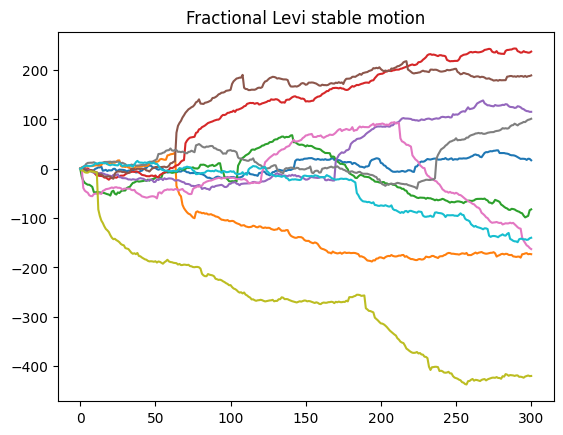

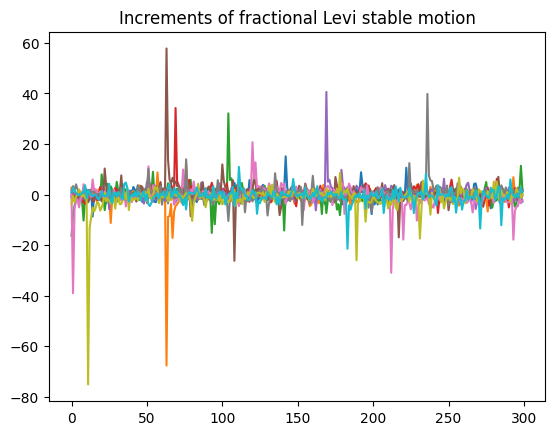

In [14]:
N = 10
Z = []
incr = []

for i in range(N):
    Z.append(simulate_flsn(M1, M2, I, H, alpha, t))
    incr.append(np.diff(Z[i]))
                      
plt.plot(t, np.transpose(Z))
plt.title("Fractional Levi stable motion")
plt.show()
                      
plt.plot(t[:-1], np.transpose(incr))
plt.title("Increments of fractional Levi stable motion")
plt.show()           